In [4]:
# !pip install -U segmentation-models-pytorch albumentations --user 
!pip install albumentations
!pip install -U imgaug
!pip install -U albumentations[imgaug]

!pip list | grep imgaug

zsh:1: no matches found: albumentations[imgaug]
imgaug                      0.4.0


In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = '/Users/jinseokhong/data/'
CATEGORY=[
        {"name": "wall", "id": 2978, "trainId": 0},
        {"name": "floor, flooring", "id": 976, "trainId": 1},
        {"name": "ceiling", "id": 447, "trainId": 2},
        {"name": "windowpane, window", "id": 3055, "trainId": 3},
        {"name": "table", "id": 2684, "trainId": 4},
        {"name": "background", "id": 9999, "trainId": 5},

        {"name": "tree", "id": 2855, "trainId": 255},
        {"name": "road, route", "id": 2131, "trainId": 6},
        {"name": "bed", "id": 165, "trainId": 7},
        {"name": "sidewalk, pavement", "id": 2377, "trainId": 8},
        {"name": "earth, ground", "id": 838, "trainId": 9},
        {"name": "cabinet", "id": 350, "trainId": 10},
        {"name": "person, individual, someone, somebody, mortal, soul", "id": 1831, "trainId": 11},
        {"name": "grass", "id": 1125, "trainId": 12},
        {"name": "building, edifice", "id": 312, "trainId": 13},
        {"name": "car, auto, automobile, machine, motorcar", "id": 401, "trainId": 14},
        {"name": "mountain, mount", "id": 1610, "trainId": 15},
        {"name": "plant, flora, plant life", "id": 1910, "trainId": 16},
        {"name": "sky", "id": 2420, "trainId": 17},
        {"name": "chair", "id": 471, "trainId": 18},
        {"name": "curtain, drape, drapery, mantle, pall", "id": 687, "trainId": 19},
        {"name": "door", "id": 774, "trainId": 20},
        {"name": "sofa, couch, lounge", "id": 2473, "trainId": 21},
        {"name": "sea", "id": 2264, "trainId": 22},
        {"name": "painting, picture", "id": 1735, "trainId": 23},
        {"name": "water", "id": 2994, "trainId": 24},
        {"name": "mirror", "id": 1564, "trainId": 25},
        {"name": "house", "id": 1276, "trainId": 26},
        {"name": "rug, carpet, carpeting", "id": 2178, "trainId": 27},
        {"name": "shelf", "id": 2329, "trainId": 28},
        {"name": "armchair", "id": 57, "trainId": 29},
        {"name": "fence, fencing", "id": 907, "trainId": 30},
        {"name": "field", "id": 913, "trainId": 31},
        {"name": "lamp", "id": 1395, "trainId": 32},
        {"name": "rock, stone", "id": 2138, "trainId": 33},
        {"name": "seat", "id": 2272, "trainId": 34},
        {"name": "river", "id": 2128, "trainId": 35},
        {"name": "desk", "id": 724, "trainId": 36},
        {"name": "bathtub, bathing tub, bath, tub", "id": 155, "trainId": 37},
        {"name": "railing, rail", "id": 2053, "trainId": 38},
        {"name": "signboard, sign", "id": 2380, "trainId": 39},
        {"name": "cushion", "id": 689, "trainId": 40},
        {"name": "path", "id": 1788, "trainId": 41},
        {"name": "work surface", "id": 3087, "trainId": 42},
        {"name": "stairs, steps", "id": 2530, "trainId": 43},
        {"name": "column, pillar", "id": 581, "trainId": 44},
        {"name": "sink", "id": 2388, "trainId": 45},
        {"name": "wardrobe, closet, press", "id": 2985, "trainId": 46},
        {"name": "snow", "id": 2454, "trainId": 47},
        {"name": "refrigerator, icebox", "id": 2096, "trainId": 48},
        {"name": "base, pedestal, stand", "id": 137, "trainId": 49},
        {"name": "bridge, span", "id": 294, "trainId": 50},
        {"name": "blind, screen", "id": 212, "trainId": 51},
        {"name": "runway", "id": 2185, "trainId": 52},
        {"name": "cliff, drop, drop-off", "id": 524, "trainId": 53},
        {"name": "sand", "id": 2212, "trainId": 54},
        {"name": "fireplace, hearth, open fireplace", "id": 943, "trainId": 55},
        {"name": "pillow", "id": 1869, "trainId": 56},
        {"name": "screen door, screen", "id": 2251, "trainId": 57},
        {"name": "toilet, can, commode, crapper, pot, potty, stool, throne", "id": 2793, "trainId": 58},
        {"name": "skyscraper", "id": 2423, "trainId": 59},
        {"name": "grandstand, covered stand", "id": 1121, "trainId": 60},
        {"name": "box", "id": 266, "trainId": 61},
        {"name": "pool table, billiard table, snooker table", "id": 1948, "trainId": 62},
        {"name": "palm, palm tree", "id": 1744, "trainId": 63},
        {"name": "double door", "id": 783, "trainId": 64},
        {"name": "coffee table, cocktail table", "id": 571, "trainId": 65},
        {"name": "counter", "id": 627, "trainId": 66},
        {"name": "countertop", "id": 629, "trainId": 67},
        {"name": "chest of drawers, chest, bureau, dresser", "id": 491, "trainId": 68},
        {"name": "kitchen island", "id": 1374, "trainId": 69},
        {"name": "boat", "id": 223, "trainId": 70},
        {"name": "waterfall, falls", "id": 3016, "trainId": 71},
        {
            "name": "stove, kitchen stove, range, kitchen range, cooking stove",
            "id": 2598,
            "trainId": 72,
        },
        {"name": "flower", "id": 978, "trainId": 73},
        {"name": "bookcase", "id": 239, "trainId": 74},
        {"name": "controls", "id": 608, "trainId": 75},
        {"name": "book", "id": 236, "trainId": 76},
        {"name": "stairway, staircase", "id": 2531, "trainId": 77},
        {"name": "streetlight, street lamp", "id": 2616, "trainId": 78},
        {
            "name": "computer, computing machine, computing device, data processor, electronic computer, information processing system",
            "id": 591,
            "trainId": 79,
        },
        {
            "name": "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, motorcoach, omnibus, passenger vehicle",
            "id": 327,
            "trainId": 80,
        },
        {"name": "swivel chair", "id": 2679, "trainId": 81},
        {"name": "light, light source", "id": 1451, "trainId": 82},
        {"name": "bench", "id": 181, "trainId": 83},
        {"name": "case, display case, showcase, vitrine", "id": 420, "trainId": 84},
        {"name": "towel", "id": 2821, "trainId": 85},
        {"name": "fountain", "id": 1023, "trainId": 86},
        {"name": "embankment", "id": 855, "trainId": 87},
        {
            "name": "television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box",
            "id": 2733,
            "trainId": 88,
        },
        {"name": "van", "id": 2928, "trainId": 89},
        {"name": "hill", "id": 1240, "trainId": 90},
        {"name": "awning, sunshade, sunblind", "id": 77, "trainId": 91},
        {"name": "poster, posting, placard, notice, bill, card", "id": 1969, "trainId": 92},
        {"name": "truck, motortruck", "id": 2880, "trainId": 93},
        {"name": "airplane, aeroplane, plane", "id": 14, "trainId": 94},
        {"name": "pole", "id": 1936, "trainId": 95},
        {"name": "tower", "id": 2828, "trainId": 96},
        {"name": "court", "id": 631, "trainId": 97},
        {"name": "ball", "id": 103, "trainId": 98},
        {
            "name": "aircraft carrier, carrier, flattop, attack aircraft carrier",
            "id": 3144,
            "trainId": 99,
        },
        {"name": "buffet, counter, sideboard", "id": 308, "trainId": 100},
        {"name": "hovel, hut, hutch, shack, shanty", "id": 1282, "trainId": 101},
        {"name": "apparel, wearing apparel, dress, clothes", "id": 38, "trainId": 102},
        {"name": "minibike, motorbike", "id": 1563, "trainId": 103},
        {"name": "animal, animate being, beast, brute, creature, fauna", "id": 29, "trainId": 104},
        {"name": "chandelier, pendant, pendent", "id": 480, "trainId": 105},
        {"name": "step, stair", "id": 2569, "trainId": 106},
        {"name": "booth, cubicle, stall, kiosk", "id": 247, "trainId": 107},
        {"name": "bicycle, bike, wheel, cycle", "id": 187, "trainId": 108},
        {"name": "doorframe, doorcase", "id": 778, "trainId": 109},
        {"name": "sconce", "id": 2243, "trainId": 110},
        {"name": "pond", "id": 1941, "trainId": 111},
        {"name": "trade name, brand name, brand, marque", "id": 2833, "trainId": 112},
        {"name": "bannister, banister, balustrade, balusters, handrail", "id": 120, "trainId": 113},
        {"name": "bag", "id": 95, "trainId": 114},
        {"name": "traffic light, traffic signal, stoplight", "id": 2836, "trainId": 115},
        {"name": "gazebo", "id": 1087, "trainId": 116},
        {"name": "escalator, moving staircase, moving stairway", "id": 868, "trainId": 117},
        {"name": "land, ground, soil", "id": 1401, "trainId": 118},
        {"name": "board, plank", "id": 220, "trainId": 119},
        {"name": "arcade machine", "id": 47, "trainId": 120},
        {"name": "eiderdown, duvet, continental quilt", "id": 843, "trainId": 121},
        {"name": "bar", "id": 123, "trainId": 122},
        {"name": "stall, stand, sales booth", "id": 2537, "trainId": 123},
        {"name": "playground", "id": 1927, "trainId": 124},
        {"name": "ship", "id": 2337, "trainId": 125},
        {"name": "ottoman, pouf, pouffe, puff, hassock", "id": 1702, "trainId": 126},
        {
            "name": "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin",
            "id": 64,
            "trainId": 127,
        },
        {"name": "bottle", "id": 249, "trainId": 128},
        {"name": "cradle", "id": 642, "trainId": 129},
        {"name": "pot, flowerpot", "id": 1981, "trainId": 130},
        {
            "name": "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
            "id": 609,
            "trainId": 131,
        },
        {"name": "train, railroad train", "id": 2840, "trainId": 132},
        {"name": "stool", "id": 2586, "trainId": 133},
        {"name": "lake", "id": 1393, "trainId": 134},
        {"name": "tank, storage tank", "id": 2704, "trainId": 135},
        {"name": "ice, water ice", "id": 1304, "trainId": 136},
        {"name": "basket, handbasket", "id": 146, "trainId": 137},
        {"name": "manhole", "id": 1494, "trainId": 138},
        {"name": "tent, collapsible shelter", "id": 2739, "trainId": 139},
        {"name": "canopy", "id": 389, "trainId": 140},
        {"name": "microwave, microwave oven", "id": 1551, "trainId": 141},
        {"name": "barrel, cask", "id": 131, "trainId": 142},
        {"name": "dirt track", "id": 738, "trainId": 143},
        {"name": "beam", "id": 161, "trainId": 144},
        {"name": "dishwasher, dish washer, dishwashing machine", "id": 747, "trainId": 145},
        {"name": "plate", "id": 1919, "trainId": 146},
        {"name": "screen, crt screen", "id": 3109, "trainId": 147},
        {"name": "ruins", "id": 2179, "trainId": 148},
        {"name": "washer, automatic washer, washing machine", "id": 2989, "trainId": 149},
        {"name": "blanket, cover", "id": 206, "trainId": 150},
        {"name": "plaything, toy", "id": 1930, "trainId": 151},
        {"name": "food, solid food", "id": 1002, "trainId": 152},
        {"name": "screen, silver screen, projection screen", "id": 2254, "trainId": 153},
        {"name": "oven", "id": 1708, "trainId": 154},
        {"name": "stage", "id": 2526, "trainId": 155},
        {"name": "beacon, lighthouse, beacon light, pharos", "id": 160, "trainId": 156},
        {"name": "umbrella", "id": 2901, "trainId": 157},
        {"name": "sculpture", "id": 2262, "trainId": 158},
        {"name": "aqueduct", "id": 44, "trainId": 159},
        {"name": "container", "id": 597, "trainId": 160},
        {"name": "scaffolding, staging", "id": 2235, "trainId": 161},
        {"name": "hood, exhaust hood", "id": 1260, "trainId": 162},
        {"name": "curb, curbing, kerb", "id": 682, "trainId": 163},
        {"name": "roller coaster", "id": 2151, "trainId": 164},
        {"name": "horse, equus caballus", "id": 3107, "trainId": 165},
        {"name": "catwalk", "id": 432, "trainId": 166},
        {"name": "glass, drinking glass", "id": 1098, "trainId": 167},
        {"name": "vase", "id": 2932, "trainId": 168},
        {"name": "central reservation", "id": 461, "trainId": 169},
        {"name": "carousel", "id": 410, "trainId": 170},
        {"name": "radiator", "id": 2046, "trainId": 171},
        {"name": "closet", "id": 533, "trainId": 172},
        {"name": "machine", "id": 1481, "trainId": 173},
        {"name": "pier, wharf, wharfage, dock", "id": 1858, "trainId": 174},
        {"name": "fan", "id": 894, "trainId": 175},
        {"name": "inflatable bounce game", "id": 1322, "trainId": 176},
        {"name": "pitch", "id": 1891, "trainId": 177},
        {"name": "paper", "id": 1756, "trainId": 178},
        {"name": "arcade, colonnade", "id": 49, "trainId": 179},
        {"name": "hot tub", "id": 1272, "trainId": 180},
        {"name": "helicopter", "id": 1229, "trainId": 181},
        {"name": "tray", "id": 2850, "trainId": 182},
        {"name": "partition, divider", "id": 1784, "trainId": 183},
        {"name": "vineyard", "id": 2962, "trainId": 184},
        {"name": "bowl", "id": 259, "trainId": 185},
        {"name": "bullring", "id": 319, "trainId": 186},
        {"name": "flag", "id": 954, "trainId": 187},
        {"name": "pot", "id": 1974, "trainId": 188},
        {"name": "footbridge, overcrossing, pedestrian bridge", "id": 1013, "trainId": 189},
        {"name": "shower", "id": 2356, "trainId": 190},
        {"name": "bag, traveling bag, travelling bag, grip, suitcase", "id": 97, "trainId": 191},
        {"name": "bulletin board, notice board", "id": 318, "trainId": 192},
        {"name": "confessional booth", "id": 592, "trainId": 193},
        {"name": "trunk, tree trunk, bole", "id": 2885, "trainId": 194},
        {"name": "forest", "id": 1017, "trainId": 195},
        {"name": "elevator door", "id": 851, "trainId": 196},
        {"name": "laptop, laptop computer", "id": 1407, "trainId": 197},
        {"name": "instrument panel", "id": 1332, "trainId": 198},
        {"name": "bucket, pail", "id": 303, "trainId": 199},
        {"name": "tapestry, tapis", "id": 2714, "trainId": 200},
        {"name": "platform", "id": 1924, "trainId": 201},
        {"name": "jacket", "id": 1346, "trainId": 202},
        {"name": "gate", "id": 1081, "trainId": 203},
        {"name": "monitor, monitoring device", "id": 1583, "trainId": 204},
        {
            "name": "telephone booth, phone booth, call box, telephone box, telephone kiosk",
            "id": 2727,
            "trainId": 205,
        },
        {"name": "spotlight, spot", "id": 2509, "trainId": 206},
        {"name": "ring", "id": 2123, "trainId": 207},
        {"name": "control panel", "id": 602, "trainId": 208},
        {"name": "blackboard, chalkboard", "id": 202, "trainId": 209},
        {"name": "air conditioner, air conditioning", "id": 10, "trainId": 210},
        {"name": "chest", "id": 490, "trainId": 211},
        {"name": "clock", "id": 530, "trainId": 212},
        {"name": "sand dune", "id": 2213, "trainId": 213},
        {"name": "pipe, pipage, piping", "id": 1884, "trainId": 214},
        {"name": "vault", "id": 2934, "trainId": 215},
        {"name": "table football", "id": 2687, "trainId": 216},
        {"name": "cannon", "id": 387, "trainId": 217},
        {"name": "swimming pool, swimming bath, natatorium", "id": 2668, "trainId": 218},
        {"name": "fluorescent, fluorescent fixture", "id": 982, "trainId": 219},
        {"name": "statue", "id": 2547, "trainId": 220},
        {
            "name": "loudspeaker, speaker, speaker unit, loudspeaker system, speaker system",
            "id": 1474,
            "trainId": 221,
        },
        {"name": "exhibitor", "id": 877, "trainId": 222},
        {"name": "ladder", "id": 1391, "trainId": 223},
        {"name": "carport", "id": 414, "trainId": 224},
        {"name": "dam", "id": 698, "trainId": 225},
        {"name": "pulpit", "id": 2019, "trainId": 226},
        {"name": "skylight, fanlight", "id": 2422, "trainId": 227},
        {"name": "water tower", "id": 3010, "trainId": 228},
        {"name": "grill, grille, grillwork", "id": 1139, "trainId": 229},
        {"name": "display board", "id": 753, "trainId": 230},
        {"name": "pane, pane of glass, window glass", "id": 1747, "trainId": 231},
        {"name": "rubbish, trash, scrap", "id": 2175, "trainId": 232},
        {"name": "ice rink", "id": 1301, "trainId": 233},
        {"name": "fruit", "id": 1033, "trainId": 234},
        {"name": "patio", "id": 1789, "trainId": 235},
        {"name": "vending machine", "id": 2939, "trainId": 236},
        {"name": "telephone, phone, telephone set", "id": 2730, "trainId": 237},
        {"name": "net", "id": 1652, "trainId": 238},
        {
            "name": "backpack, back pack, knapsack, packsack, rucksack, haversack",
            "id": 90,
            "trainId": 239,
        },
        {"name": "jar", "id": 1349, "trainId": 240},
        {"name": "track", "id": 2830, "trainId": 241},
        {"name": "magazine", "id": 1485, "trainId": 242},
        {"name": "shutter", "id": 2370, "trainId": 243},
        {"name": "roof", "id": 2155, "trainId": 244},
        {"name": "banner, streamer", "id": 118, "trainId": 245},
        {"name": "landfill", "id": 1402, "trainId": 246},
        {"name": "post", "id": 1957, "trainId": 247},
        {"name": "altarpiece, reredos", "id": 3130, "trainId": 248},
        {"name": "hat, chapeau, lid", "id": 1197, "trainId": 249},
        {"name": "arch, archway", "id": 52, "trainId": 250},
        {"name": "table game", "id": 2688, "trainId": 251},
        {"name": "bag, handbag, pocketbook, purse", "id": 96, "trainId": 252},
        {"name": "document, written document, papers", "id": 762, "trainId": 253},
        {"name": "dome", "id": 772, "trainId": 254},

        {"name": "shanties", "id": 2315, "trainId": 256},
        {"name": "forecourt", "id": 1016, "trainId": 257},
        {"name": "crane", "id": 643, "trainId": 258},
        {"name": "dog, domestic dog, canis familiaris", "id": 3105, "trainId": 259},
        {"name": "piano, pianoforte, forte-piano", "id": 1849, "trainId": 260},
        {"name": "drawing", "id": 791, "trainId": 261},
        {"name": "cabin", "id": 349, "trainId": 262},
        {
            "name": "ad, advertisement, advertizement, advertising, advertizing, advert",
            "id": 6,
            "trainId": 263,
        },
        {"name": "amphitheater, amphitheatre, coliseum", "id": 3114, "trainId": 264},
        {"name": "monument", "id": 1587, "trainId": 265},
        {"name": "henhouse", "id": 1233, "trainId": 266},
        {"name": "cockpit", "id": 559, "trainId": 267},
        {"name": "heater, warmer", "id": 1223, "trainId": 268},
        {"name": "windmill, aerogenerator, wind generator", "id": 3049, "trainId": 269},
        {"name": "pool", "id": 1943, "trainId": 270},
        {"name": "elevator, lift", "id": 853, "trainId": 271},
        {"name": "decoration, ornament, ornamentation", "id": 709, "trainId": 272},
        {"name": "labyrinth", "id": 1390, "trainId": 273},
        {"name": "text, textual matter", "id": 2748, "trainId": 274},
        {"name": "printer", "id": 2007, "trainId": 275},
        {"name": "mezzanine, first balcony", "id": 1546, "trainId": 276},
        {"name": "mattress", "id": 1513, "trainId": 277},
        {"name": "straw", "id": 2600, "trainId": 278},
        {"name": "stalls", "id": 2538, "trainId": 279},
        {"name": "patio, terrace", "id": 1790, "trainId": 280},
        {"name": "billboard, hoarding", "id": 194, "trainId": 281},
        {"name": "bus stop", "id": 326, "trainId": 282},
        {"name": "trouser, pant", "id": 2877, "trainId": 283},
        {"name": "console table, console", "id": 594, "trainId": 284},
        {"name": "rack", "id": 2036, "trainId": 285},
        {"name": "notebook", "id": 1662, "trainId": 286},
        {"name": "shrine", "id": 2366, "trainId": 287},
        {"name": "pantry", "id": 1754, "trainId": 288},
        {"name": "cart", "id": 418, "trainId": 289},
        {"name": "steam shovel", "id": 2553, "trainId": 290},
        {"name": "porch", "id": 1951, "trainId": 291},
        {"name": "postbox, mailbox, letter box", "id": 1963, "trainId": 292},
        {"name": "figurine, statuette", "id": 918, "trainId": 293},
        {"name": "recycling bin", "id": 2086, "trainId": 294},
        {"name": "folding screen", "id": 997, "trainId": 295},
        {"name": "telescope", "id": 2731, "trainId": 296},
        {"name": "deck chair, beach chair", "id": 704, "trainId": 297},
        {"name": "kennel", "id": 1365, "trainId": 298},
        {"name": "coffee maker", "id": 569, "trainId": 299},
        {"name": "altar, communion table, lord's table", "id": 3108, "trainId": 300},
        {"name": "fish", "id": 948, "trainId": 301},
        {"name": "easel", "id": 839, "trainId": 302},
        {"name": "artificial golf green", "id": 63, "trainId": 303},
        {"name": "iceberg", "id": 1305, "trainId": 304},
        {"name": "candlestick, candle holder", "id": 378, "trainId": 305},
        {"name": "shower stall, shower bath", "id": 2362, "trainId": 306},
        {"name": "television stand", "id": 2734, "trainId": 307},
        {
            "name": "wall socket, wall plug, electric outlet, electrical outlet, outlet, electric receptacle",
            "id": 2982,
            "trainId": 308,
        },
        {"name": "skeleton", "id": 2398, "trainId": 309},
        {"name": "grand piano, grand", "id": 1119, "trainId": 310},
        {"name": "candy, confect", "id": 382, "trainId": 311},
        {"name": "grille door", "id": 1141, "trainId": 312},
        {"name": "pedestal, plinth, footstall", "id": 1805, "trainId": 313},
        {"name": "jersey, t-shirt, tee shirt", "id": 3102, "trainId": 314},
        {"name": "shoe", "id": 2341, "trainId": 315},
        {"name": "gravestone, headstone, tombstone", "id": 1131, "trainId": 316},
        {"name": "shanty", "id": 2316, "trainId": 317},
        {"name": "structure", "id": 2626, "trainId": 318},
        {"name": "rocking chair, rocker", "id": 3104, "trainId": 319},
        {"name": "bird", "id": 198, "trainId": 320},
        {"name": "place mat", "id": 1896, "trainId": 321},
        {"name": "tomb", "id": 2800, "trainId": 322},
        {"name": "big top", "id": 190, "trainId": 323},
        {"name": "gas pump, gasoline pump, petrol pump, island dispenser", "id": 3131, "trainId": 324},
        {"name": "lockers", "id": 1463, "trainId": 325},
        {"name": "cage", "id": 357, "trainId": 326},
        {"name": "finger", "id": 929, "trainId": 327},
        {"name": "bleachers", "id": 209, "trainId": 328},
        {"name": "ferris wheel", "id": 912, "trainId": 329},
        {"name": "hairdresser chair", "id": 1164, "trainId": 330},
        {"name": "mat", "id": 1509, "trainId": 331},
        {"name": "stands", "id": 2539, "trainId": 332},
        {"name": "aquarium, fish tank, marine museum", "id": 3116, "trainId": 333},
        {"name": "streetcar, tram, tramcar, trolley, trolley car", "id": 2615, "trainId": 334},
        {"name": "napkin, table napkin, serviette", "id": 1644, "trainId": 335},
        {"name": "dummy", "id": 818, "trainId": 336},
        {"name": "booklet, brochure, folder, leaflet, pamphlet", "id": 242, "trainId": 337},
        {"name": "sand trap", "id": 2217, "trainId": 338},
        {"name": "shop, store", "id": 2347, "trainId": 339},
        {"name": "table cloth", "id": 2686, "trainId": 340},
        {"name": "service station", "id": 2300, "trainId": 341},
        {"name": "coffin", "id": 572, "trainId": 342},
        {"name": "drawer", "id": 789, "trainId": 343},
        {"name": "cages", "id": 358, "trainId": 344},
        {"name": "slot machine, coin machine", "id": 2443, "trainId": 345},
        {"name": "balcony", "id": 101, "trainId": 346},
        {"name": "volleyball court", "id": 2969, "trainId": 347},
        {"name": "table tennis", "id": 2692, "trainId": 348},
        {"name": "control table", "id": 606, "trainId": 349},
        {"name": "shirt", "id": 2339, "trainId": 350},
        {"name": "merchandise, ware, product", "id": 1533, "trainId": 351},
        {"name": "railway", "id": 2060, "trainId": 352},
        {"name": "parterre", "id": 1782, "trainId": 353},
        {"name": "chimney", "id": 495, "trainId": 354},
        {"name": "can, tin, tin can", "id": 371, "trainId": 355},
        {"name": "tanks", "id": 2707, "trainId": 356},
        {"name": "fabric, cloth, material, textile", "id": 889, "trainId": 357},
        {"name": "alga, algae", "id": 3156, "trainId": 358},
        {"name": "system", "id": 2683, "trainId": 359},
        {"name": "map", "id": 1499, "trainId": 360},
        {"name": "greenhouse", "id": 1135, "trainId": 361},
        {"name": "mug", "id": 1619, "trainId": 362},
        {"name": "barbecue", "id": 125, "trainId": 363},
        {"name": "trailer", "id": 2838, "trainId": 364},
        {"name": "toilet tissue, toilet paper, bathroom tissue", "id": 2792, "trainId": 365},
        {"name": "organ", "id": 1695, "trainId": 366},
        {"name": "dishrag, dishcloth", "id": 746, "trainId": 367},
        {"name": "island", "id": 1343, "trainId": 368},
        {"name": "keyboard", "id": 1370, "trainId": 369},
        {"name": "trench", "id": 2858, "trainId": 370},
        {"name": "basket, basketball hoop, hoop", "id": 145, "trainId": 371},
        {"name": "steering wheel, wheel", "id": 2565, "trainId": 372},
        {"name": "pitcher, ewer", "id": 1892, "trainId": 373},
        {"name": "goal", "id": 1103, "trainId": 374},
        {"name": "bread, breadstuff, staff of life", "id": 286, "trainId": 375},
        {"name": "beds", "id": 170, "trainId": 376},
        {"name": "wood", "id": 3073, "trainId": 377},
        {"name": "file cabinet", "id": 922, "trainId": 378},
        {"name": "newspaper, paper", "id": 1655, "trainId": 379},
        {"name": "motorboat", "id": 1602, "trainId": 380},
        {"name": "rope", "id": 2160, "trainId": 381},
        {"name": "guitar", "id": 1151, "trainId": 382},
        {"name": "rubble", "id": 2176, "trainId": 383},
        {"name": "scarf", "id": 2239, "trainId": 384},
        {"name": "barrels", "id": 132, "trainId": 385},
        {"name": "cap", "id": 394, "trainId": 386},
        {"name": "leaves", "id": 1424, "trainId": 387},
        {"name": "control tower", "id": 607, "trainId": 388},
        {"name": "dashboard", "id": 700, "trainId": 389},
        {"name": "bandstand", "id": 116, "trainId": 390},
        {"name": "lectern", "id": 1425, "trainId": 391},
        {"name": "switch, electric switch, electrical switch", "id": 2676, "trainId": 392},
        {"name": "baseboard, mopboard, skirting board", "id": 141, "trainId": 393},
        {"name": "shower room", "id": 2360, "trainId": 394},
        {"name": "smoke", "id": 2449, "trainId": 395},
        {"name": "faucet, spigot", "id": 897, "trainId": 396},
        {"name": "bulldozer", "id": 317, "trainId": 397},
        {"name": "saucepan", "id": 2228, "trainId": 398},
        {"name": "shops", "id": 2351, "trainId": 399},
        {"name": "meter", "id": 1543, "trainId": 400},
        {"name": "crevasse", "id": 656, "trainId": 401},
        {"name": "gear", "id": 1088, "trainId": 402},
        {"name": "candelabrum, candelabra", "id": 373, "trainId": 403},
        {"name": "sofa bed", "id": 2472, "trainId": 404},
        {"name": "tunnel", "id": 2892, "trainId": 405},
        {"name": "pallet", "id": 1740, "trainId": 406},
        {"name": "wire, conducting wire", "id": 3067, "trainId": 407},
        {"name": "kettle, boiler", "id": 1367, "trainId": 408},
        {"name": "bidet", "id": 188, "trainId": 409},
        {
            "name": "baby buggy, baby carriage, carriage, perambulator, pram, stroller, go-cart, pushchair, pusher",
            "id": 79,
            "trainId": 410,
        },
        {"name": "music stand", "id": 1633, "trainId": 411},
        {"name": "pipe, tube", "id": 1885, "trainId": 412},
        {"name": "cup", "id": 677, "trainId": 413},
        {"name": "parking meter", "id": 1779, "trainId": 414},
        {"name": "ice hockey rink", "id": 1297, "trainId": 415},
        {"name": "shelter", "id": 2334, "trainId": 416},
        {"name": "weeds", "id": 3027, "trainId": 417},
        {"name": "temple", "id": 2735, "trainId": 418},
        {"name": "patty, cake", "id": 1791, "trainId": 419},
        {"name": "ski slope", "id": 2405, "trainId": 420},
        {"name": "panel", "id": 1748, "trainId": 421},
        {"name": "wallet", "id": 2983, "trainId": 422},
        {"name": "wheel", "id": 3035, "trainId": 423},
        {"name": "towel rack, towel horse", "id": 2824, "trainId": 424},
        {"name": "roundabout", "id": 2168, "trainId": 425},
        {"name": "canister, cannister, tin", "id": 385, "trainId": 426},
        {"name": "rod", "id": 2148, "trainId": 427},
        {"name": "soap dispenser", "id": 2465, "trainId": 428},
        {"name": "bell", "id": 175, "trainId": 429},
        {"name": "canvas", "id": 390, "trainId": 430},
        {"name": "box office, ticket office, ticket booth", "id": 268, "trainId": 431},
        {"name": "teacup", "id": 2722, "trainId": 432},
        {"name": "trellis", "id": 2857, "trainId": 433},
        {"name": "workbench", "id": 3088, "trainId": 434},
        {"name": "valley, vale", "id": 2926, "trainId": 435},
        {"name": "toaster", "id": 2782, "trainId": 436},
        {"name": "knife", "id": 1378, "trainId": 437},
        {"name": "podium", "id": 1934, "trainId": 438},
        {"name": "ramp", "id": 2072, "trainId": 439},
        {"name": "tumble dryer", "id": 2889, "trainId": 440},
        {"name": "fireplug, fire hydrant, plug", "id": 944, "trainId": 441},
        {"name": "gym shoe, sneaker, tennis shoe", "id": 1158, "trainId": 442},
        {"name": "lab bench", "id": 1383, "trainId": 443},
        {"name": "equipment", "id": 867, "trainId": 444},
        {"name": "rocky formation", "id": 2145, "trainId": 445},
        {"name": "plastic", "id": 1915, "trainId": 446},
        {"name": "calendar", "id": 361, "trainId": 447},
        {"name": "caravan", "id": 402, "trainId": 448},
        {"name": "check-in-desk", "id": 482, "trainId": 449},
        {"name": "ticket counter", "id": 2761, "trainId": 450},
        {"name": "brush", "id": 300, "trainId": 451},
        {"name": "mill", "id": 1554, "trainId": 452},
        {"name": "covered bridge", "id": 636, "trainId": 453},
        {"name": "bowling alley", "id": 260, "trainId": 454},
        {"name": "hanger", "id": 1186, "trainId": 455},
        {"name": "excavator", "id": 871, "trainId": 456},
        {"name": "trestle", "id": 2859, "trainId": 457},
        {"name": "revolving door", "id": 2103, "trainId": 458},
        {"name": "blast furnace", "id": 208, "trainId": 459},
        {"name": "scale, weighing machine", "id": 2236, "trainId": 460},
        {"name": "projector", "id": 2012, "trainId": 461},
        {"name": "soap", "id": 2462, "trainId": 462},
        {"name": "locker", "id": 1462, "trainId": 463},
        {"name": "tractor", "id": 2832, "trainId": 464},
        {"name": "stretcher", "id": 2617, "trainId": 465},
        {"name": "frame", "id": 1024, "trainId": 466},
        {"name": "grating", "id": 1129, "trainId": 467},
        {"name": "alembic", "id": 18, "trainId": 468},
        {"name": "candle, taper, wax light", "id": 376, "trainId": 469},
        {"name": "barrier", "id": 134, "trainId": 470},
        {"name": "cardboard", "id": 407, "trainId": 471},
        {"name": "cave", "id": 434, "trainId": 472},
        {"name": "puddle", "id": 2017, "trainId": 473},
        {"name": "tarp", "id": 2717, "trainId": 474},
        {"name": "price tag", "id": 2005, "trainId": 475},
        {"name": "watchtower", "id": 2993, "trainId": 476},
        {"name": "meters", "id": 1545, "trainId": 477},
        {
            "name": "light bulb, lightbulb, bulb, incandescent lamp, electric light, electric-light bulb",
            "id": 1445,
            "trainId": 478,
        },
        {"name": "tracks", "id": 2831, "trainId": 479},
        {"name": "hair dryer", "id": 1161, "trainId": 480},
        {"name": "skirt", "id": 2411, "trainId": 481},
        {"name": "viaduct", "id": 2949, "trainId": 482},
        {"name": "paper towel", "id": 1769, "trainId": 483},
        {"name": "coat", "id": 552, "trainId": 484},
        {"name": "sheet", "id": 2327, "trainId": 485},
        {"name": "fire extinguisher, extinguisher, asphyxiator", "id": 939, "trainId": 486},
        {"name": "water wheel", "id": 3013, "trainId": 487},
        {"name": "pottery, clayware", "id": 1986, "trainId": 488},
        {"name": "magazine rack", "id": 1486, "trainId": 489},
        {"name": "teapot", "id": 2723, "trainId": 490},
        {"name": "microphone, mike", "id": 1549, "trainId": 491},
        {"name": "support", "id": 2649, "trainId": 492},
        {"name": "forklift", "id": 1020, "trainId": 493},
        {"name": "canyon", "id": 392, "trainId": 494},
        {"name": "cash register, register", "id": 422, "trainId": 495},
        {"name": "leaf, leafage, foliage", "id": 1419, "trainId": 496},
        {"name": "remote control, remote", "id": 2099, "trainId": 497},
        {"name": "soap dish", "id": 2464, "trainId": 498},
        {"name": "windshield, windscreen", "id": 3058, "trainId": 499},
        {"name": "cat", "id": 430, "trainId": 500},
        {"name": "cue, cue stick, pool cue, pool stick", "id": 675, "trainId": 501},
        {"name": "vent, venthole, vent-hole, blowhole", "id": 2941, "trainId": 502},
        {"name": "videos", "id": 2955, "trainId": 503},
        {"name": "shovel", "id": 2355, "trainId": 504},
        {"name": "eaves", "id": 840, "trainId": 505},
        {"name": "antenna, aerial, transmitting aerial", "id": 32, "trainId": 506},
        {"name": "shipyard", "id": 2338, "trainId": 507},
        {"name": "hen, biddy", "id": 1232, "trainId": 508},
        {"name": "traffic cone", "id": 2834, "trainId": 509},
        {"name": "washing machines", "id": 2991, "trainId": 510},
        {"name": "truck crane", "id": 2879, "trainId": 511},
        {"name": "cds", "id": 444, "trainId": 512},
        {"name": "niche", "id": 1657, "trainId": 513},
        {"name": "scoreboard", "id": 2246, "trainId": 514},
        {"name": "briefcase", "id": 296, "trainId": 515},
        {"name": "boot", "id": 245, "trainId": 516},
        {"name": "sweater, jumper", "id": 2661, "trainId": 517},
        {"name": "hay", "id": 1202, "trainId": 518},
        {"name": "pack", "id": 1714, "trainId": 519},
        {"name": "bottle rack", "id": 251, "trainId": 520},
        {"name": "glacier", "id": 1095, "trainId": 521},
        {"name": "pergola", "id": 1828, "trainId": 522},
        {"name": "building materials", "id": 311, "trainId": 523},
        {"name": "television camera", "id": 2732, "trainId": 524},
        {"name": "first floor", "id": 947, "trainId": 1},
        {"name": "rifle", "id": 2115, "trainId": 526},
        {"name": "tennis table", "id": 2738, "trainId": 527},
        {"name": "stadium", "id": 2525, "trainId": 528},
        {"name": "safety belt", "id": 2194, "trainId": 529},
        {"name": "cover", "id": 634, "trainId": 530},
        {"name": "dish rack", "id": 740, "trainId": 531},
        {"name": "synthesizer", "id": 2682, "trainId": 532},
        {"name": "pumpkin", "id": 2020, "trainId": 533},
        {"name": "gutter", "id": 1156, "trainId": 534},
        {"name": "fruit stand", "id": 1036, "trainId": 535},
        {"name": "ice floe, floe", "id": 1295, "trainId": 536},
        {"name": "handle, grip, handgrip, hold", "id": 1181, "trainId": 537},
        {"name": "wheelchair", "id": 3037, "trainId": 538},
        {"name": "mousepad, mouse mat", "id": 1614, "trainId": 539},
        {"name": "diploma", "id": 736, "trainId": 540},
        {"name": "fairground ride", "id": 893, "trainId": 541},
        {"name": "radio", "id": 2047, "trainId": 542},
        {"name": "hotplate", "id": 1274, "trainId": 543},
        {"name": "junk", "id": 1361, "trainId": 544},
        {"name": "wheelbarrow", "id": 3036, "trainId": 545},
        {"name": "stream", "id": 2606, "trainId": 546},
        {"name": "toll plaza", "id": 2797, "trainId": 547},
        {"name": "punching bag", "id": 2022, "trainId": 548},
        {"name": "trough", "id": 2876, "trainId": 549},
        {"name": "throne", "id": 2758, "trainId": 550},
        {"name": "chair desk", "id": 472, "trainId": 551},
        {"name": "weighbridge", "id": 3028, "trainId": 552},
        {"name": "extractor fan", "id": 882, "trainId": 553},
        {"name": "hanging clothes", "id": 1189, "trainId": 554},
        {"name": "dish, dish aerial, dish antenna, saucer", "id": 743, "trainId": 555},
        {"name": "alarm clock, alarm", "id": 3122, "trainId": 556},
        {"name": "ski lift", "id": 2401, "trainId": 557},
        {"name": "chain", "id": 468, "trainId": 558},
        {"name": "garage", "id": 1061, "trainId": 559},
        {"name": "mechanical shovel", "id": 1523, "trainId": 560},
        {"name": "wine rack", "id": 3059, "trainId": 561},
        {"name": "tramway", "id": 2843, "trainId": 562},
        {"name": "treadmill", "id": 2853, "trainId": 563},
        {"name": "menu", "id": 1529, "trainId": 564},
        {"name": "block", "id": 214, "trainId": 565},
        {"name": "well", "id": 3032, "trainId": 566},
        {"name": "witness stand", "id": 3071, "trainId": 567},
        {"name": "branch", "id": 277, "trainId": 568},
        {"name": "duck", "id": 813, "trainId": 569},
        {"name": "casserole", "id": 426, "trainId": 570},
        {"name": "frying pan", "id": 1039, "trainId": 571},
        {"name": "desk organizer", "id": 727, "trainId": 572},
        {"name": "mast", "id": 1508, "trainId": 573},
        {"name": "spectacles, specs, eyeglasses, glasses", "id": 2490, "trainId": 574},
        {"name": "service elevator", "id": 2299, "trainId": 575},
        {"name": "dollhouse", "id": 768, "trainId": 576},
        {"name": "hammock", "id": 1172, "trainId": 577},
        {"name": "clothes hanging", "id": 537, "trainId": 578},
        {"name": "photocopier", "id": 1847, "trainId": 579},
        {"name": "notepad", "id": 1664, "trainId": 580},
        {"name": "golf cart", "id": 1110, "trainId": 581},
        {"name": "footpath", "id": 1014, "trainId": 582},
        {"name": "cross", "id": 662, "trainId": 583},
        {"name": "baptismal font", "id": 121, "trainId": 584},
        {"name": "boiler", "id": 227, "trainId": 585},
        {"name": "skip", "id": 2410, "trainId": 586},
        {"name": "rotisserie", "id": 2165, "trainId": 587},
        {"name": "tables", "id": 2696, "trainId": 588},
        {"name": "water mill", "id": 3005, "trainId": 589},
        {"name": "helmet", "id": 1231, "trainId": 590},
        {"name": "cover curtain", "id": 635, "trainId": 591},
        {"name": "brick", "id": 292, "trainId": 592},
        {"name": "table runner", "id": 2690, "trainId": 593},
        {"name": "ashtray", "id": 65, "trainId": 594},
        {"name": "street box", "id": 2607, "trainId": 595},
        {"name": "stick", "id": 2574, "trainId": 596},
        {"name": "hangers", "id": 1188, "trainId": 597},
        {"name": "cells", "id": 456, "trainId": 598},
        {"name": "urinal", "id": 2913, "trainId": 599},
        {"name": "centerpiece", "id": 459, "trainId": 600},
        {"name": "portable fridge", "id": 1955, "trainId": 601},
        {"name": "dvds", "id": 827, "trainId": 602},
        {"name": "golf club", "id": 1111, "trainId": 603},
        {"name": "skirting board", "id": 2412, "trainId": 604},
        {"name": "water cooler", "id": 2997, "trainId": 605},
        {"name": "clipboard", "id": 528, "trainId": 606},
        {"name": "camera, photographic camera", "id": 366, "trainId": 607},
        {"name": "pigeonhole", "id": 1863, "trainId": 608},
        {"name": "chips", "id": 500, "trainId": 609},
        {"name": "food processor", "id": 1001, "trainId": 610},
        {"name": "post box", "id": 1958, "trainId": 611},
        {"name": "lid", "id": 1441, "trainId": 612},
        {"name": "drum", "id": 809, "trainId": 613},
        {"name": "blender", "id": 210, "trainId": 614},
        {"name": "cave entrance", "id": 435, "trainId": 615},
        {"name": "dental chair", "id": 718, "trainId": 616},
        {"name": "obelisk", "id": 1674, "trainId": 617},
        {"name": "canoe", "id": 388, "trainId": 618},
        {"name": "mobile", "id": 1572, "trainId": 619},
        {"name": "monitors", "id": 1584, "trainId": 620},
        {"name": "pool ball", "id": 1944, "trainId": 621},
        {"name": "cue rack", "id": 674, "trainId": 622},
        {"name": "baggage carts", "id": 99, "trainId": 623},
        {"name": "shore", "id": 2352, "trainId": 624},
        {"name": "fork", "id": 1019, "trainId": 625},
        {"name": "paper filer", "id": 1763, "trainId": 626},
        {"name": "bicycle rack", "id": 185, "trainId": 627},
        {"name": "coat rack", "id": 554, "trainId": 628},
        {"name": "garland", "id": 1066, "trainId": 629},
        {"name": "sports bag", "id": 2508, "trainId": 630},
        {"name": "fish tank", "id": 951, "trainId": 631},
        {"name": "towel dispenser", "id": 2822, "trainId": 632},
        {"name": "carriage", "id": 415, "trainId": 633},
        {"name": "brochure", "id": 297, "trainId": 634},
        {"name": "plaque", "id": 1914, "trainId": 635},
        {"name": "stringer", "id": 2619, "trainId": 636},
        {"name": "iron", "id": 1338, "trainId": 637},
        {"name": "spoon", "id": 2505, "trainId": 638},
        {"name": "flag pole", "id": 955, "trainId": 639},
        {"name": "toilet brush", "id": 2786, "trainId": 640},
        {"name": "book stand", "id": 238, "trainId": 641},
        {"name": "water faucet, water tap, tap, hydrant", "id": 3000, "trainId": 642},
        {"name": "ticket office", "id": 2763, "trainId": 643},
        {"name": "broom", "id": 299, "trainId": 644},
        {"name": "dvd", "id": 822, "trainId": 645},
        {"name": "ice bucket", "id": 1288, "trainId": 646},
        {"name": "carapace, shell, cuticle, shield", "id": 3101, "trainId": 647},
        {"name": "tureen", "id": 2894, "trainId": 648},
        {"name": "folders", "id": 992, "trainId": 649},
        {"name": "chess", "id": 489, "trainId": 650},
        {"name": "root", "id": 2157, "trainId": 651},
        {"name": "sewing machine", "id": 2309, "trainId": 652},
        {"name": "model", "id": 1576, "trainId": 653},
        {"name": "pen", "id": 1810, "trainId": 654},
        {"name": "violin", "id": 2964, "trainId": 655},
        {"name": "sweatshirt", "id": 2662, "trainId": 656},
        {"name": "recycling materials", "id": 2087, "trainId": 657},
        {"name": "mitten", "id": 1569, "trainId": 658},
        {"name": "chopping board, cutting board", "id": 503, "trainId": 659},
        {"name": "mask", "id": 1505, "trainId": 660},
        {"name": "log", "id": 1468, "trainId": 661},
        {"name": "mouse, computer mouse", "id": 1613, "trainId": 662},
        {"name": "grill", "id": 1138, "trainId": 663},
        {"name": "hole", "id": 1256, "trainId": 664},
        {"name": "target", "id": 2715, "trainId": 665},
        {"name": "trash bag", "id": 2846, "trainId": 666},
        {"name": "chalk", "id": 477, "trainId": 667},
        {"name": "sticks", "id": 2576, "trainId": 668},
        {"name": "balloon", "id": 108, "trainId": 669},
        {"name": "score", "id": 2245, "trainId": 670},
        {"name": "hair spray", "id": 1162, "trainId": 671},
        {"name": "roll", "id": 2149, "trainId": 672},
        {"name": "runner", "id": 2183, "trainId": 673},
        {"name": "engine", "id": 858, "trainId": 674},
        {"name": "inflatable glove", "id": 1324, "trainId": 675},
        {"name": "games", "id": 1055, "trainId": 676},
        {"name": "pallets", "id": 1741, "trainId": 677},
        {"name": "baskets", "id": 149, "trainId": 678},
        {"name": "coop", "id": 615, "trainId": 679},
        {"name": "dvd player", "id": 825, "trainId": 680},
        {"name": "rocking horse", "id": 2143, "trainId": 681},
        {"name": "buckets", "id": 304, "trainId": 682},
        {"name": "bread rolls", "id": 283, "trainId": 683},
        {"name": "shawl", "id": 2322, "trainId": 684},
        {"name": "watering can", "id": 3017, "trainId": 685},
        {"name": "spotlights", "id": 2510, "trainId": 686},
        {"name": "post-it", "id": 1960, "trainId": 687},
        {"name": "bowls", "id": 265, "trainId": 688},
        {"name": "security camera", "id": 2282, "trainId": 689},
        {"name": "runner cloth", "id": 2184, "trainId": 690},
        {"name": "lock", "id": 1461, "trainId": 691},
        {"name": "alarm, warning device, alarm system", "id": 3113, "trainId": 692},
        {"name": "side", "id": 2372, "trainId": 693},
        {"name": "roulette", "id": 2166, "trainId": 694},
        {"name": "bone", "id": 232, "trainId": 695},
        {"name": "cutlery", "id": 693, "trainId": 696},
        {"name": "pool balls", "id": 1945, "trainId": 697},
        {"name": "wheels", "id": 3039, "trainId": 698},
        {"name": "spice rack", "id": 2494, "trainId": 699},
        {"name": "plant pots", "id": 1908, "trainId": 700},
        {"name": "towel ring", "id": 2827, "trainId": 701},
        {"name": "bread box", "id": 280, "trainId": 702},
        {"name": "video", "id": 2950, "trainId": 703},
        {"name": "funfair", "id": 1044, "trainId": 704},
        {"name": "breads", "id": 288, "trainId": 705},
        {"name": "tripod", "id": 2863, "trainId": 706},
        {"name": "ironing board", "id": 1342, "trainId": 707},
        {"name": "skimmer", "id": 2409, "trainId": 708},
        {"name": "hollow", "id": 1258, "trainId": 709},
        {"name": "scratching post", "id": 2249, "trainId": 710},
        {"name": "tricycle", "id": 2862, "trainId": 711},
        {"name": "file box", "id": 920, "trainId": 712},
        {"name": "mountain pass", "id": 1607, "trainId": 713},
        {"name": "tombstones", "id": 2802, "trainId": 714},
        {"name": "cooker", "id": 610, "trainId": 715},
        {"name": "card game, cards", "id": 3129, "trainId": 716},
        {"name": "golf bag", "id": 1108, "trainId": 717},
        {"name": "towel paper", "id": 2823, "trainId": 718},
        {"name": "chaise lounge", "id": 476, "trainId": 719},
        {"name": "sun", "id": 2641, "trainId": 720},
        {"name": "toilet paper holder", "id": 2788, "trainId": 721},
        {"name": "rake", "id": 2070, "trainId": 722},
        {"name": "key", "id": 1368, "trainId": 723},
        {"name": "umbrella stand", "id": 2903, "trainId": 724},
        {"name": "dartboard", "id": 699, "trainId": 725},
        {"name": "transformer", "id": 2844, "trainId": 726},
        {"name": "fireplace utensils", "id": 942, "trainId": 727},
        {"name": "sweatshirts", "id": 2663, "trainId": 728},
        {
            "name": "cellular telephone, cellular phone, cellphone, cell, mobile phone",
            "id": 457,
            "trainId": 729,
        },
        {"name": "tallboy", "id": 2701, "trainId": 730},
        {"name": "stapler", "id": 2540, "trainId": 731},
        {"name": "sauna", "id": 2231, "trainId": 732},
        {"name": "test tube", "id": 2746, "trainId": 733},
        {"name": "palette", "id": 1738, "trainId": 734},
        {"name": "shopping carts", "id": 2350, "trainId": 735},
        {"name": "tools", "id": 2808, "trainId": 736},
        {"name": "push button, push, button", "id": 2025, "trainId": 737},
        {"name": "star", "id": 2541, "trainId": 738},
        {"name": "roof rack", "id": 2156, "trainId": 739},
        {"name": "barbed wire", "id": 126, "trainId": 740},
        {"name": "spray", "id": 2512, "trainId": 741},
        {"name": "ear", "id": 831, "trainId": 742},
        {"name": "sponge", "id": 2503, "trainId": 743},
        {"name": "racket", "id": 2039, "trainId": 744},
        {"name": "tins", "id": 2774, "trainId": 745},
        {"name": "eyeglasses", "id": 886, "trainId": 746},
        {"name": "file", "id": 919, "trainId": 747},
        {"name": "scarfs", "id": 2240, "trainId": 748},
        {"name": "sugar bowl", "id": 2636, "trainId": 749},
        {"name": "flip flop", "id": 963, "trainId": 750},
        {"name": "headstones", "id": 1218, "trainId": 751},
        {"name": "laptop bag", "id": 1406, "trainId": 752},
        {"name": "leash", "id": 1420, "trainId": 753},
        {"name": "climbing frame", "id": 526, "trainId": 754},
        {"name": "suit hanger", "id": 2639, "trainId": 755},
        {"name": "floor spotlight", "id": 975, "trainId": 1},
        {"name": "plate rack", "id": 1921, "trainId": 757},
        {"name": "sewer", "id": 2305, "trainId": 758},
        {"name": "hard drive", "id": 1193, "trainId": 759},
        {"name": "sprinkler", "id": 2517, "trainId": 760},
        {"name": "tools box", "id": 2809, "trainId": 761},
        {"name": "necklace", "id": 1647, "trainId": 762},
        {"name": "bulbs", "id": 314, "trainId": 763},
        {"name": "steel industry", "id": 2560, "trainId": 764},
        {"name": "club", "id": 545, "trainId": 765},
        {"name": "jack", "id": 1345, "trainId": 766},
        {"name": "door bars", "id": 775, "trainId": 767},
        {
            "name": "control panel, instrument panel, control board, board, panel",
            "id": 603,
            "trainId": 768,
        },
        {"name": "hairbrush", "id": 1163, "trainId": 769},
        {"name": "napkin holder", "id": 1641, "trainId": 770},
        {"name": "office", "id": 1678, "trainId": 771},
        {"name": "smoke detector", "id": 2450, "trainId": 772},
        {"name": "utensils", "id": 2915, "trainId": 773},
        {"name": "apron", "id": 42, "trainId": 774},
        {"name": "scissors", "id": 2242, "trainId": 775},
        {"name": "terminal", "id": 2741, "trainId": 776},
        {"name": "grinder", "id": 1143, "trainId": 777},
        {"name": "entry phone", "id": 862, "trainId": 778},
        {"name": "newspaper stand", "id": 1654, "trainId": 779},
        {"name": "pepper shaker", "id": 1826, "trainId": 780},
        {"name": "onions", "id": 1689, "trainId": 781},
        {
            "name": "central processing unit, cpu, c p u , central processor, processor, mainframe",
            "id": 3124,
            "trainId": 782,
        },
        {"name": "tape", "id": 2710, "trainId": 783},
        {"name": "bat", "id": 152, "trainId": 784},
        {"name": "coaster", "id": 549, "trainId": 785},
        {"name": "calculator", "id": 360, "trainId": 786},
        {"name": "potatoes", "id": 1982, "trainId": 787},
        {"name": "luggage rack", "id": 1478, "trainId": 788},
        {"name": "salt", "id": 2203, "trainId": 789},
        {"name": "street number", "id": 2612, "trainId": 790},
        {"name": "viewpoint", "id": 2956, "trainId": 791},
        {"name": "sword", "id": 2681, "trainId": 792},
        {"name": "cd", "id": 437, "trainId": 793},
        {"name": "rowing machine", "id": 2171, "trainId": 794},
        {"name": "plug", "id": 1933, "trainId": 795},
        {"name": "andiron, firedog, dog, dog-iron", "id": 3110, "trainId": 796},
        {"name": "pepper", "id": 1824, "trainId": 797},
        {"name": "tongs", "id": 2803, "trainId": 798},
        {"name": "bonfire", "id": 234, "trainId": 799},
        {"name": "dog dish", "id": 764, "trainId": 800},
        {"name": "belt", "id": 177, "trainId": 801},
        {"name": "dumbbells", "id": 817, "trainId": 802},
        {"name": "videocassette recorder, vcr", "id": 3145, "trainId": 803},
        {"name": "hook", "id": 1262, "trainId": 804},
        {"name": "envelopes", "id": 864, "trainId": 805},
        {"name": "shower faucet", "id": 2359, "trainId": 806},
        {"name": "watch", "id": 2992, "trainId": 807},
        {"name": "padlock", "id": 1725, "trainId": 808},
        {"name": "swimming pool ladder", "id": 2667, "trainId": 809},
        {"name": "spanners", "id": 2484, "trainId": 810},
        {"name": "gravy boat", "id": 1133, "trainId": 811},
        {"name": "notice board", "id": 1667, "trainId": 812},
        {"name": "trash bags", "id": 2847, "trainId": 813},
        {"name": "fire alarm", "id": 932, "trainId": 814},
        {"name": "ladle", "id": 1392, "trainId": 815},
        {"name": "stethoscope", "id": 2573, "trainId": 816},
        {"name": "rocket", "id": 2140, "trainId": 817},
        {"name": "funnel", "id": 1046, "trainId": 818},
        {"name": "bowling pins", "id": 264, "trainId": 819},
        {"name": "valve", "id": 2927, "trainId": 820},
        {"name": "thermometer", "id": 2752, "trainId": 821},
        {"name": "cups", "id": 679, "trainId": 822},
        {"name": "spice jar", "id": 2493, "trainId": 823},
        {"name": "night light", "id": 1658, "trainId": 824},
        {"name": "soaps", "id": 2466, "trainId": 825},
        {"name": "games table", "id": 1057, "trainId": 826},
        {"name": "slotted spoon", "id": 2444, "trainId": 827},
        {"name": "reel", "id": 2093, "trainId": 828},
        {"name": "scourer", "id": 2248, "trainId": 829},
        {"name": "sleeping robe", "id": 2432, "trainId": 830},
        {"name": "desk mat", "id": 726, "trainId": 831},
        {"name": "dumbbell", "id": 816, "trainId": 832},
        {"name": "hammer", "id": 1171, "trainId": 833},
        {"name": "tie", "id": 2766, "trainId": 834},
        {"name": "typewriter", "id": 2900, "trainId": 835},
        {"name": "shaker", "id": 2313, "trainId": 836},
        {"name": "cheese dish", "id": 488, "trainId": 837},
        {"name": "sea star", "id": 2265, "trainId": 838},
        {"name": "racquet", "id": 2043, "trainId": 839},
        {"name": "butane gas cylinder", "id": 332, "trainId": 840},
        {"name": "paper weight", "id": 1771, "trainId": 841},
        {"name": "shaving brush", "id": 2320, "trainId": 842},
        {"name": "sunglasses", "id": 2646, "trainId": 843},
        {"name": "gear shift", "id": 1089, "trainId": 844},
        {"name": "towel rail", "id": 2826, "trainId": 845},
        {"name": "adding machine, totalizer, totaliser", "id": 3148, "trainId": 846},
        {"name": "pier", "id": 1857, "trainId": 847},
    ]
PALLETE=np.array([
    [255, 0, 0],
    [0, 255, 0],
    [0, 0, 255],
    [255, 255, 0],
    [0, 255, 255],
    [0, 0, 0]
    ])

In [7]:
train_file = os.path.join(DATA_DIR, 'train_data_list.txt')
valid_file = os.path.join(DATA_DIR, 'valid_data_list.txt')

In [8]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [9]:
from PIL import Image
import numpy as np


def loadAde20K(file):
    fileseg = file.replace('.jpg', '_seg.png')
    with Image.open(fileseg) as io:
        seg = np.array(io)

    R = seg[:, :, 0]
    G = seg[:, :, 1]
    B = seg[:, :, 2]
    ObjectClassMasks = (R / 10).astype(np.int32) * 256 + (G.astype(np.int32))
    return {'img_name': file, 'segm_name': fileseg, 'class_mask': ObjectClassMasks}


In [10]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [59]:
class Dataset(BaseDataset):

    CLASSES = ['wall', 'floor', 'ceiling', 'windowpane', 'table', 'background']
    
    def __init__(
            self, 
            images_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None
            ):
        
        self.dataset = np.loadtxt(images_dir, dtype=str)
        self.img = self.dataset[:, 0]
        self.ann = self.dataset[:, 1]

        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        if torch.is_tensor(i):
            i = i.tolist()
        
        info = loadAde20K(DATA_DIR + self.img[i])
        image = np.array(Image.open(DATA_DIR + self.img[i]).convert('RGB'))
        mask = info['class_mask']
        mask = np.array(Image.fromarray(self.encode_segmap(mask)))
        mask = np.expand_dims(mask, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask.squeeze()
        
    def __len__(self):
        return len(self.dataset)

    def encode_segmap(self, mask):
        result = mask.copy()
        result[:] = CATEGORY[5]["trainId"]
        result[mask == CATEGORY[0]["id"]] = CATEGORY[0]["trainId"]
        result[mask == CATEGORY[1]["id"]] = CATEGORY[1]["trainId"]
        result[mask == CATEGORY[2]["id"]] = CATEGORY[2]["trainId"]
        result[mask == CATEGORY[3]["id"]] = CATEGORY[3]["trainId"]
        result[mask == CATEGORY[4]["id"]] = CATEGORY[4]["trainId"]
        return result

(1650, 2200, 3) (1650, 2200)


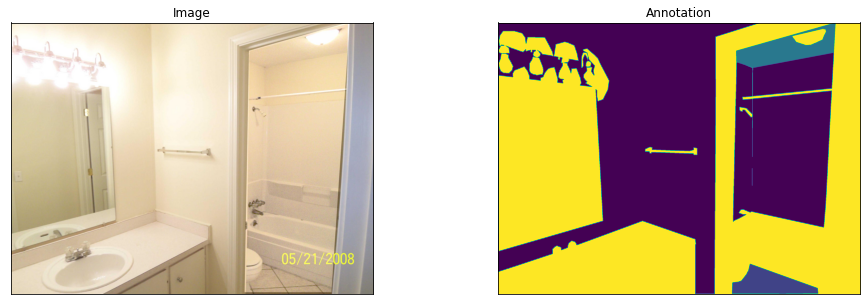

In [60]:
# Lets look at data we have

dataset = Dataset(train_file, classes=['wall', 'floor', 'ceiling', 'windowpane', 'table'])

image, mask = dataset[3] # get some sample
print(image.shape, mask.shape)
visualize(
    image=image, 
    annotation=mask.squeeze(),
)

In [61]:
!pip list | grep album
import albumentations as albu

albumentations              1.1.0


In [62]:
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomResizedCrop(height=320, width=320, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def to_tensor_ann(x, **kwargs):
    return x.transpose(2, 0, 1).astype('long')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor_ann),
    ]
    return albu.Compose(_transform)

(320, 320, 3) (320, 320)


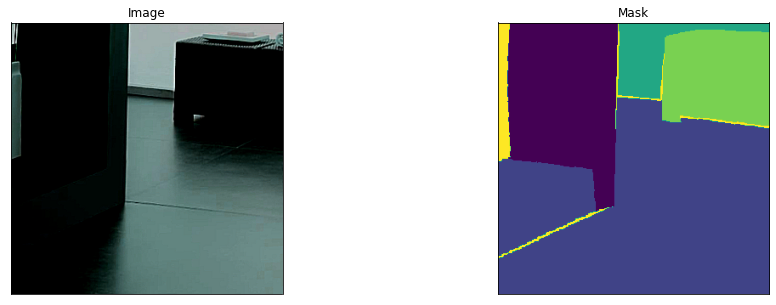

(320, 320, 3) (320, 320)


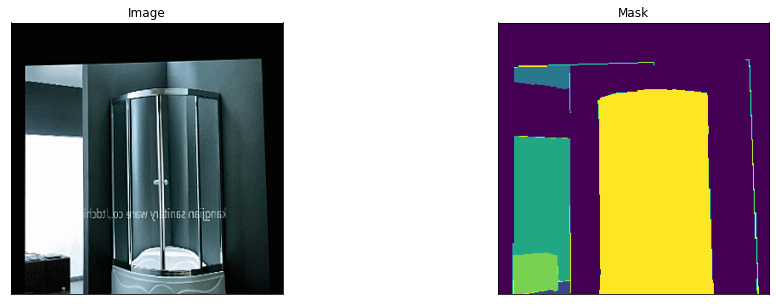

(320, 320, 3) (320, 320)


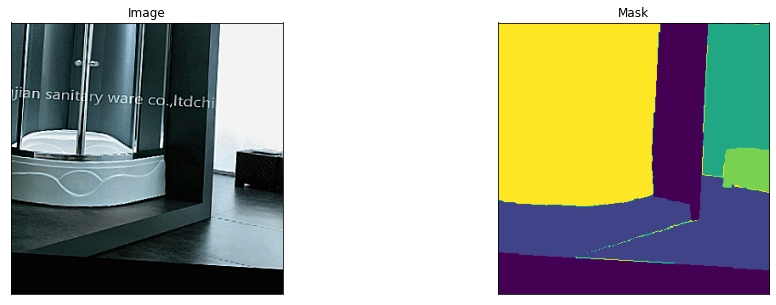

In [63]:

#### Visualize resulted augmented images and masks

augmented_dataset = Dataset(
    train_file, 
    augmentation=get_training_augmentation(), 
    classes=['wall', 'floor', 'ceiling', 'windowpane', 'table'],
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[1]
    print(image.shape, mask.shape)
    visualize(image=image, mask=mask.squeeze())

In [64]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

In [65]:
ENCODER = 'resnet101'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['wall', 'floor', 'ceiling', 'windowpane', 'table', 'background']
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cpu'
LEARNING_RATE = 0.1

# create segmentation model with pretrained encoder
model = smp.DeepLabV3(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [66]:
train_dataset = Dataset(
    train_file, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    valid_file, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=0)

In [70]:
# Dice/F1 score - https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# IoU/Jaccard score - https://en.wikipedia.org/wiki/Jaccard_index

loss = smp.utils.losses.CrossEntropyLoss()
metrics = [smp.utils.metrics.Accuracy(),]
optimizer = torch.optim.SGD([ 
    dict(params=model.parameters(), lr=LEARNING_RATE),
])

In [71]:
# create epoch runners 
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [72]:
# train model for 40 epochs

max_score = 0

for i in range(0, 40):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, './best_model.pth')
        print('Model saved!')
        
    if (i+1) % 10 == 0:
        LEARNING_RATE = LEARNING_RATE * 0.1
        optimizer.param_groups[0]['lr'] = LEARNING_RATE
        print('Decrease decoder learning rate to {0}!'.format(LEARNING_RATE))


Epoch: 0
train:   0%|          | 0/1899 [00:02<?, ?it/s]


RuntimeError: The size of tensor a (2) must match the size of tensor b (6) at non-singleton dimension 1